In [0]:
import numpy as np
from matplotlib import pyplot as plt
import random
from matplotlib import cm

from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn import decomposition

Load dataset

In [0]:
(x,y) = datasets.load_iris(return_X_y=True)
num_of_gaussians = 3

Generate multivariate gaussian data for given mean and covariance

In [0]:
def generate_multivariate_gaussian_data(mean,cov,n):
    return np.random.multivariate_normal(mean,cov,n)

Principal Component Analysis on 'n' -dimension with highest n eigen-values

In [0]:
def PCA_projection(x):

    pca = decomposition.PCA(n_components=2)
    pca.fit(x)
    return pca.transform(x)

In [0]:
def plot_func(x,col):
    plt.scatter(x[:,0],x[:,1],color=col)

Projection of data 'x' and random shuffling of 'x'

In [0]:
x_projected = []
x_projected = PCA_projection(x) 

population = 'Fill in the blank' 
x_projected = x_projected[population]
y = y[population]

Call the inbuilt Gaussian Mixture from sklearn

In [22]:
gmm = GaussianMixture(n_components=num_of_gaussians)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Loading Means and Covariances of the learnt gaussian

In [23]:
mu = gmm.means_
sigma = gmm.covariances_ 
print(mu)
print('\n')
print(sigma)

[[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]


[[[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]


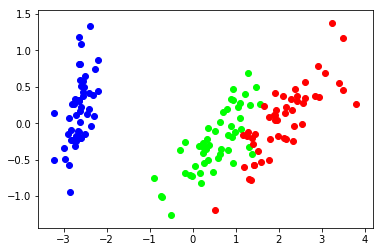

In [24]:
plot_func(x_projected[np.where(y==0)[0]],[0,0,1])
plot_func(x_projected[np.where(y==1)[0]],[0,1,0])
plot_func(x_projected[np.where(y==2)[0]],[1,0,0])

plt.show()

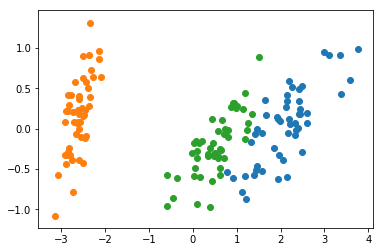

In [30]:
data = []
no_of_points = 50

for i in range(0,num_of_gaussians):
    data.extend(list(generate_multivariate_gaussian_data(mu[i],sigma[i], no_of_points)))

data = np.array(data)

pca = decomposition.PCA('Fill in the blank')
pca.fit(data)
data = pca.transform(data)

for i in range(0,num_of_gaussians):    
    arr=[1/(i+1),1/(i+2),1/(i+3)]    
    plot_func(data[i*no_of_points:(i+1)*no_of_points], random.shuffle(arr))

plt.show()